In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Define the number of samples
num_samples = 500

# Create a list of categories and shopping malls
categories = ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverages', 'Souvenir', 'Technology', 'Toys']
shopping_malls = ['Cevvahir AVM', 'Emamr Square Mall']

# Create a dictionary to store data
data = {
    'Invoice_no': [f'I{i}' for i in range(138884, 138884 + num_samples)],
    'Cust_id': [f'C{i}' for i in range(241288, 241288 + num_samples)],
    'Gender': np.random.choice(['Female', 'Male'], size=num_samples),
    'Age': np.random.randint(18, 80, size=num_samples),
    'Category': np.random.choice(categories, size=num_samples),
    'Quantity': np.random.randint(1, 10, size=num_samples),
    'Price': np.random.uniform(5, 200, size=num_samples),
    'Payment': np.random.choice(['Credit card', 'Debit card', 'Cash'], size=num_samples),
    'Invoice_date': [datetime(2023, 1, 1) + timedelta(days=np.random.randint(1, 365)) for _ in range(num_samples)],
    'Shopping_mall': np.random.choice(shopping_malls, size=num_samples)
}

# Introduce duplicate values
duplicate_idx = np.random.choice(range(num_samples), size=10)
for idx in duplicate_idx:
    data['Invoice_no'][idx] = data['Invoice_no'][idx - 1]
    data['Cust_id'][idx] = data['Cust_id'][idx - 1]

# Create a DataFrame
df = pd.DataFrame(data)

# Export to CSV
df.to_csv("Dummy_Shopping_Data.csv", index=False)


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("Dummy_Shopping_Data.csv")
data.head

<bound method NDFrame.head of     Invoice_no  Cust_id  Gender  Age          Category  Quantity       Price  \
0      I138884  C241288    Male   23  Food & Beverages         7  150.690602   
1      I138885  C241289    Male   39             Shoes         2  180.590434   
2      I138886  C241290  Female   46        Technology         8   59.962192   
3      I138887  C241291    Male   26             Books         4  149.059470   
4      I138887  C241291  Female   62             Shoes         5   22.672834   
..         ...      ...     ...  ...               ...       ...         ...   
495    I139379  C241783  Female   69          Clothing         6   12.405447   
496    I139380  C241784  Female   32             Shoes         2   28.090778   
497    I139381  C241785    Male   72        Technology         7   47.103237   
498    I139382  C241786  Female   64         Cosmetics         6   95.314501   
499    I139383  C241787  Female   35          Souvenir         5  118.567485   

         

In [5]:
data.groupby("Shopping_mall").count()

,Invoice_no,Cust_id,Gender,Age,Category,Quantity,Price,Payment,Invoice_date
Shopping_mall,,,,,,,,,
Cevvahir AVM,262,262,262,262,262,262,262,262,262
Emamr Square Mall,238,238,238,238,238,238,238,238,238


In [6]:
data.groupby("Category").count()

,Invoice_no,Cust_id,Gender,Age,Quantity,Price,Payment,Invoice_date,Shopping_mall
Category,,,,,,,,,
Books,58,58,58,58,58,58,58,58,58
Clothing,61,61,61,61,61,61,61,61,61
Cosmetics,56,56,56,56,56,56,56,56,56
Food & Beverages,72,72,72,72,72,72,72,72,72
Shoes,78,78,78,78,78,78,78,78,78
Souvenir,59,59,59,59,59,59,59,59,59
Technology,53,53,53,53,53,53,53,53,53
Toys,63,63,63,63,63,63,63,63,63


In [12]:
branch_sale=data.groupby("Shopping_mall").sum()

In [13]:
category_sales=data.groupby("Category").sum()

In [15]:
branch_sale.sort_values(by="Price",ascending=False)

,Invoice_no,Cust_id,Gender,Age,Category,Quantity,Price,Payment,Invoice_date
Shopping_mall,,,,,,,,,
Cevvahir AVM,I138884I138885I138886I138887I138891I138892I138...,C241288C241289C241290C241291C241295C241296C241...,MaleMaleFemaleFemaleFemaleFemaleFemaleMaleFema...,12662,Food & BeveragesShoesTechnologyShoesFood & Bev...,1296,25843.066457,Debit cardCredit cardDebit cardCashCashCredit ...,2023-02-062023-06-222023-08-262023-08-282023-0...
Emamr Square Mall,I138887I138889I138890I138893I138894I138896I138...,C241291C241293C241294C241297C241298C241300C241...,MaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFema...,11641,BooksTechnologyFood & BeveragesClothingCosmeti...,1206,25020.813279,Debit cardCredit cardDebit cardDebit cardDebit...,2023-10-292023-11-162023-05-072023-01-172023-0...


,Invoice_no,Cust_id,Gender,Age,Quantity,Price,Payment,Invoice_date,Shopping_mall
Category,,,,,,,,,
Books,58,58,58,58,58,58,58,58,58
Clothing,61,61,61,61,61,61,61,61,61
Cosmetics,56,56,56,56,56,56,56,56,56
Food & Beverages,72,72,72,72,72,72,72,72,72
Shoes,78,78,78,78,78,78,78,78,78
Souvenir,59,59,59,59,59,59,59,59,59
Technology,53,53,53,53,53,53,53,53,53
Toys,63,63,63,63,63,63,63,63,63


In [17]:
combined_branch_category_sales=data.groupby(["Shopping_mall","Category"]).sum()

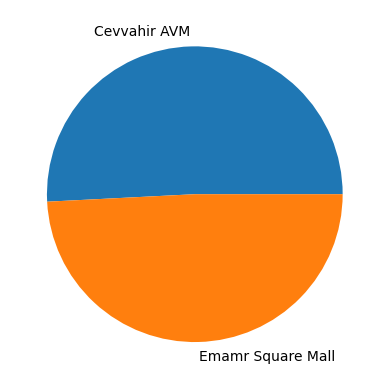

In [20]:
plt.pie(branch_sale["Price"],labels=branch_sale.index)
plt.show()

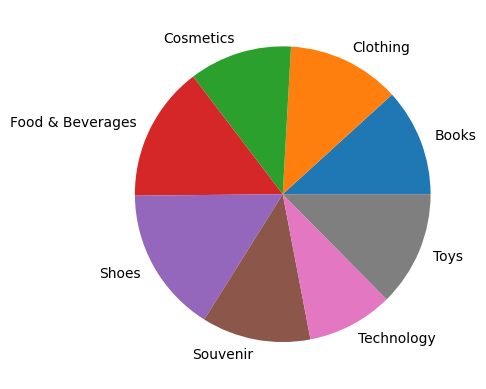

In [21]:
plt.pie(category_sale["Price"],labels=category_sale.index)
plt.show()

In [24]:
combined_pivot=data.pivot_table(index="Shopping_mall",columns="Category",values="Price")

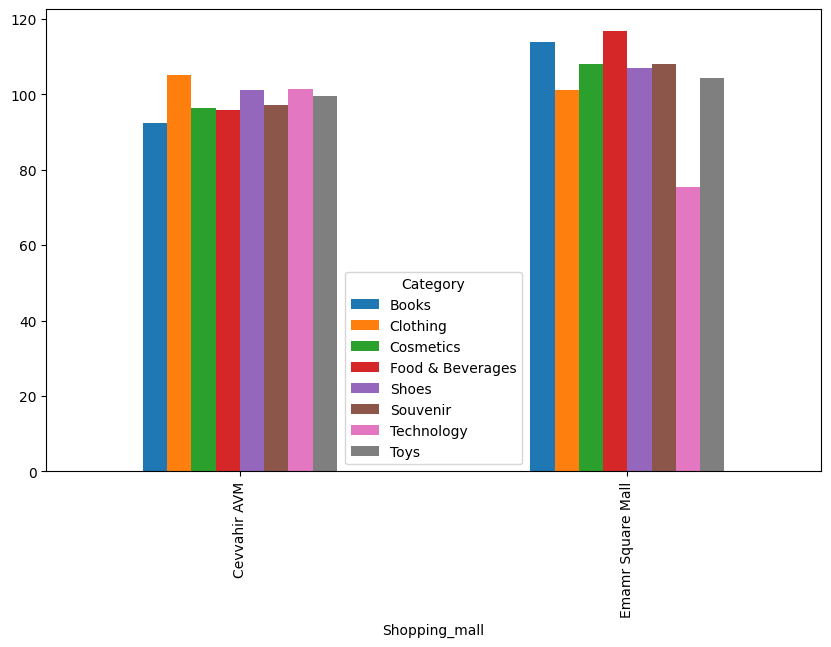

In [25]:
combined_pivot.plot(kind="bar",figsize=(10,6))
plt.show()